# Pre-processing 

## Base Model

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings('ignore')

### Load Data 

* To more reference about this data are present in exploratory-data-analysis notebook

In [21]:
# Load data
data = pd.read_csv('../data/interim/data.csv')
data2 = pd.read_csv('../data/interim/data2.csv')

# Split target variable and dependents variables
X = data.drop('diagnosis', axis=1)
X_2 = data2.drop('diagnosis', axis=1)
y = data.diagnosis

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=40)
X_train2, X_test2= train_test_split(X_2,test_size=0.2, random_state=40)

# Apply standard to each X's data: 
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)
X_train_scaler2 = scaler.fit_transform(X_train2)
X_test_scaler2 = scaler.fit_transform(X_test2)

### Features Selector to dataset = data

Criteron:  
- Select just the attribute with have above mean of importance features caculad by Random Forest with gini_criteron.  

In [22]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=40)

In [23]:
search = clf.fit(X_train_scaler, y_train)
best_params = search.feature_importances_

In [24]:
# Features selected:
sfm = SelectFromModel(clf, threshold='mean', prefit=True)
print(f'Features selected: {X_train.columns[sfm.get_support()]}.')

Features selected: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object').


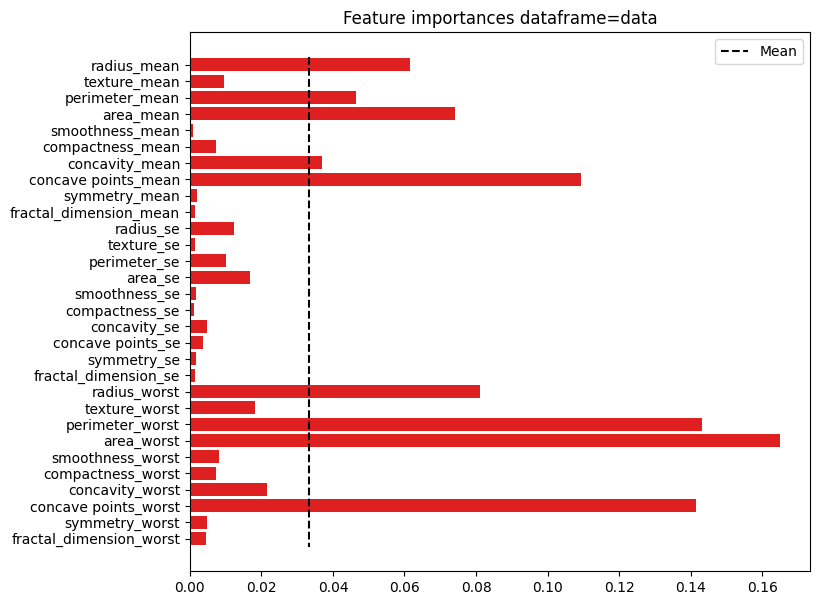

In [25]:
# Plot feature importances
plt.figure(figsize=(8, 7))
sns.barplot(orient='h', y=X.columns, x=clf.feature_importances_, color='r')
plt.vlines(
    np.mean(clf.feature_importances_), 
    ymin=-0.5, 
    ymax=len(X.columns)-0.5, 
    linestyles='--',
    label='Mean',
    color='k'
)
plt.title('Feature importances dataframe=data')
plt.legend()
plt.show()

### Features Selector to dataset = data2

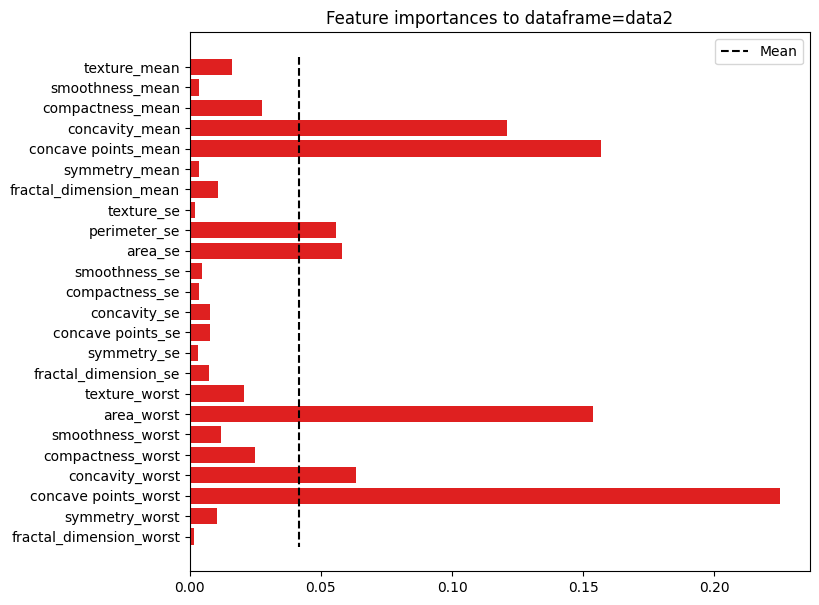

In [26]:
clf2 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=40)
search2 = clf2.fit(X_train_scaler2, y_train)
sfm2 = SelectFromModel(clf2, threshold='mean', prefit=True)

# Plot feature importances
plt.figure(figsize=(8, 7))
sns.barplot(orient='h', y=X_2.columns, x=clf2.feature_importances_, color='r')
plt.vlines(
    np.mean(clf2.feature_importances_), 
    ymin=-0.5, 
    ymax=len(X_2.columns)-0.5, 
    linestyles='--',
    label='Mean',
    color='k'
)
plt.title('Feature importances to dataframe=data2')
plt.legend()
plt.show()

### Save data

In [27]:
# save target y_train and y_test
np.savetxt('../data/processed/y_train.csv', y_train.values, delimiter=',')
np.savetxt('../data/processed/y_test.csv', y_test.values, delimiter=',')


* To dataframe = data

In [28]:
# Save train and test data with all feature
np.savetxt('../data/processed/X_data/X_train.csv', 
           X_train_scaler, 
           delimiter=','
           )
np.savetxt('../data/processed/X_data/X_test.csv',
           X_test_scaler, 
           delimiter=','
           )

# Save train and test data with select features
np.savetxt('../data/processed/X_data/X_train_feature.csv', 
           sfm.transform(X_train_scaler), 
           delimiter=','
           )
np.savetxt('../data/processed/X_data/X_test_feature.csv',
           sfm.transform(X_test_scaler), 
           delimiter=','
           )

* to dataframe = data2

In [29]:
# Save train and test data2 to all features
np.savetxt('../data/processed/X_data2/X_train2.csv', 
           X_train_scaler2, 
           delimiter=','
           )
np.savetxt('../data/processed/X_data2/X_test2.csv',
           X_test_scaler2, 
           delimiter=','
           )

# Save train and test data2 to select features
np.savetxt('../data/processed/X_data2/X_train2_features.csv', 
           sfm2.transform(X_train_scaler2), 
           delimiter=','
           )
np.savetxt('../data/processed/X_data2/X_test2_features.csv',
           sfm2.transform(X_test_scaler2), 
           delimiter=','
           )

# END